# Project Details

Analyzing seven years worth of training data tracked on the Runkeeper app.

<img src="https://cdn.shopify.com/s/files/1/0264/3689/4792/files/Hi-5_Running28_2_2048x2048.jpg?v=1592918629" alt="Runner in blue" title="Explore world, explore your data!">


### Objective
Answering questions like:

* How fast, long, and intense was my run today?
* Have I succeeded with my training goals?
* Am I progressing?
* What were my best achievements?
* How do I perform compared to others?

### Data Source
> RunKeeper app



# Preparing & Processing

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
cardio_activities = pd.read_csv('cardioActivities.csv', parse_dates=True, index_col='Date')

cardio_activities.info()
cardio_activities.sample(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2014-02-06 06:32:00,d2db35ca-1373-45d5-a1ef-a88d5aba63ad,Running,NaN,6.56,42:23,6:28,9.29,474.000000,36,NaN,NaN,NaN,2014-02-06-063200.gpx
2012-09-02 08:41:31,4a9e2e1b-3a98-4630-8a89-3632aea5559a,Running,NaN,3.14,16:16,5:11,11.56,230.000000,18,NaN,NaN,NaN,2012-09-02-084131.gpx
2016-08-01 17:40:40,513f1448-16e1-4cc3-8f1f-71c02809d8c2,Running,NaN,14.32,1:20:36,5:38,10.66,997.999999,213,151.0,NaN,TomTom MySports Watch,2016-08-01-174040.gpx


### Cleaning 

* Remove columns not useful for our analysis.
* Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.
* Count missing values.

In [29]:
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

cardio_activities = cardio_activities.drop(columns=cols_to_drop)

In [30]:
cardio_activities.head()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [31]:
cardio_activities['Type'].value_counts()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

In [32]:
cardio_activities['Type'] = cardio_activities['Type'].str.replace('Other', 'Unicycling')

In [33]:
cardio_activities['Type'].value_counts()

Running       459
Cycling        29
Walking        18
Unicycling      2
Name: Type, dtype: int64

In [35]:
cardio_activities.isnull().sum()

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

#### Missing Values
There are 214 missing entries for my average heart rate.

We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called **mean imputation**. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (Type) and calculate each activity's mean heart rate, then fill in the missing values with those means.

In [37]:
cardio_activities.groupby('Type', as_index=False)['Average Heart Rate (bpm)'].mean()

,Type,Average Heart Rate (bpm)
0,Cycling,124.40000
1,Running,144.98556
2,Unicycling,85.50000
3,Walking,NaN


In [42]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = cardio_activities[cardio_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = cardio_activities[cardio_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = cardio_activities[cardio_activities['Type'] == 'Running'].copy()
df_walk = cardio_activities[cardio_activities['Type'] == 'Walking'].copy()
df_cycle = cardio_activities[cardio_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
# Count missing values for each column in running data
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

# Analyzing

### Plot running data
As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.

In [62]:
df_run.head(2)

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0


In [89]:
run_2013_2018 = df_run['2012':'2019']
run_2013_2018.sort_index().head()

<ipython-input-89-0a72dd3ca0c3>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  run_2013_2018 = df_run['2012':'2019']


,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2013-01-02 18:35:11,Running,5.47,31:24,5:45,10.44,28,144.0
2013-01-12 08:39:55,Running,3.09,20:07,6:31,9.21,13,144.0
2013-01-15 18:40:08,Running,6.72,32:42,4:52,12.34,32,144.0
2013-01-19 09:58:50,Running,3.39,15:56,4:42,12.75,15,144.0
2013-01-23 18:38:29,Running,8.65,50:13,5:48,10.34,45,144.0


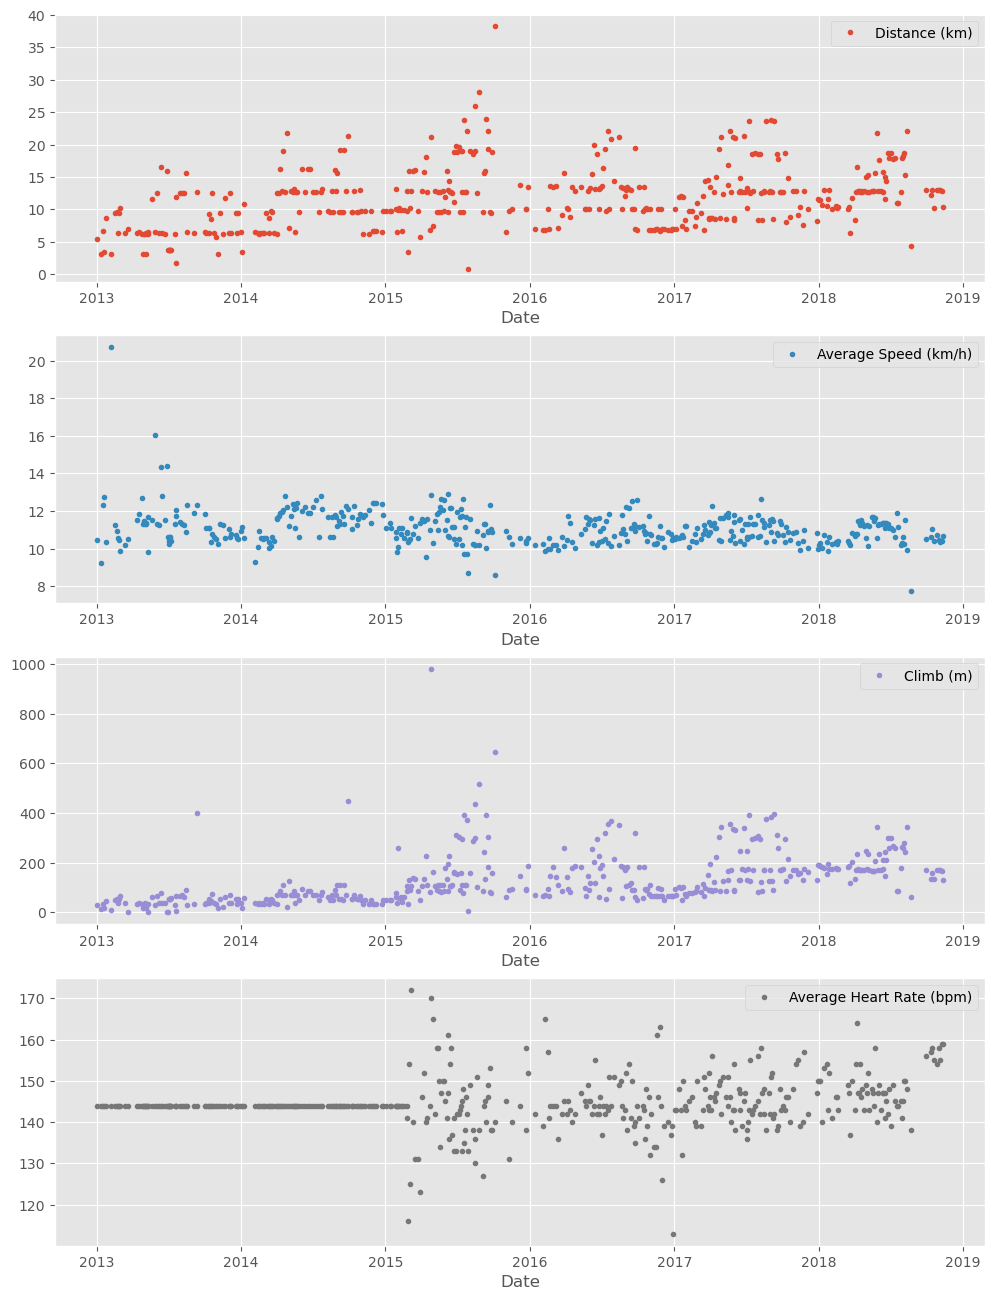

In [88]:
plt.style.use('ggplot')

run_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

plt.show()

### Running statistics
We will just work with Average heart rate from 2015 since this is the first time they are recorded.

In [92]:
run_2015_2018 = df_run.loc['2014':'2019']
run_2015_2018.sort_index().head()

<ipython-input-92-b168a6512722>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  run_2015_2018 = df_run.loc['2014':'2019']


,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2015-01-03 17:20:00,Running,9.78,52:45,5:24,11.12,51,144.0
2015-01-12 18:20:00,Running,9.78,51:45,5:18,11.34,51,144.0
2015-01-14 17:50:00,Running,9.78,52:45,5:24,11.12,51,144.0
2015-01-26 18:30:18,Running,13.11,1:14:30,5:41,10.55,76,144.0
2015-01-28 18:43:29,Running,10.02,55:13,5:31,10.89,61,144.0


In [97]:
run_2015_2018['Average Heart Rate (bpm)'].mean()

144.9009900990099

In [211]:
# Calculate annual statistics
print('How my average run looks in last 4 years:')
display(run_2015_2018.resample('A').mean())

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
display(run_2015_2018.resample('W').mean().mean())

# Mean weekly counts
weekly_counts_average = run_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

How many trainings per week I had on average: 1.5


### Visualization with averages

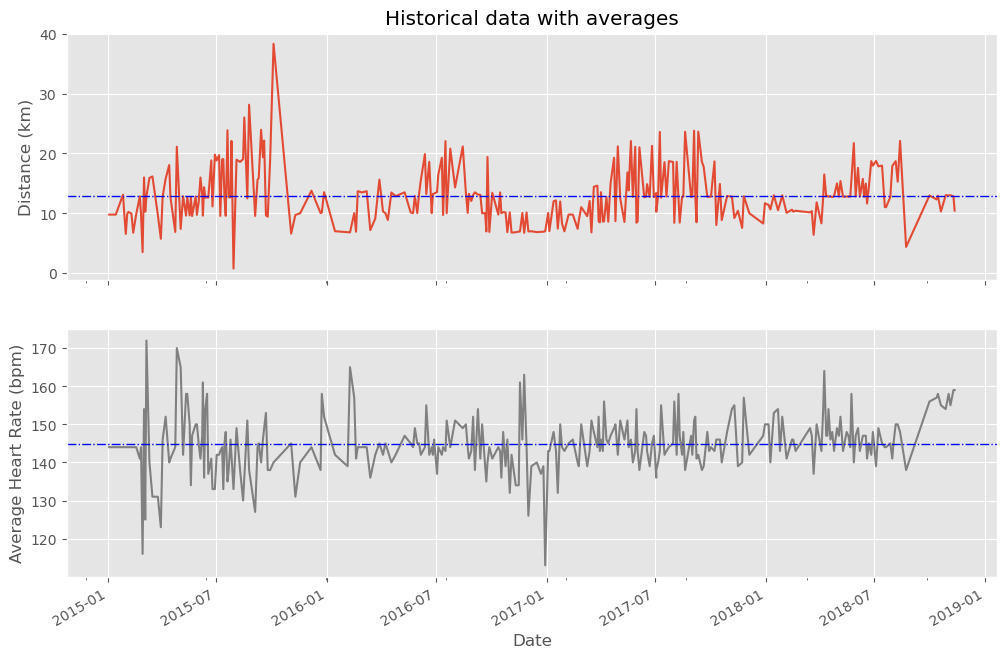

In [117]:
runs_distance = run_2015_2018['Distance (km)']
runs_hr = run_2015_2018['Average Heart Rate (bpm)']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot and customize first subplot
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.show()

### Did I reach my goals?
To motivate myself to run regularly, I set a target goal of running **1000 km per year**. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.

In [ ]:
run_2015_2018

In [122]:
run_dist_annual = run_2013_2018['Distance (km)'].resample('A').sum()
run_dist_annual

Date
2013-12-31     498.25
2014-12-31     755.76
2015-12-31    1115.43
2016-12-31     821.64
2017-12-31    1099.49
2018-12-31     853.70
Freq: A-DEC, Name: Distance (km), dtype: float64

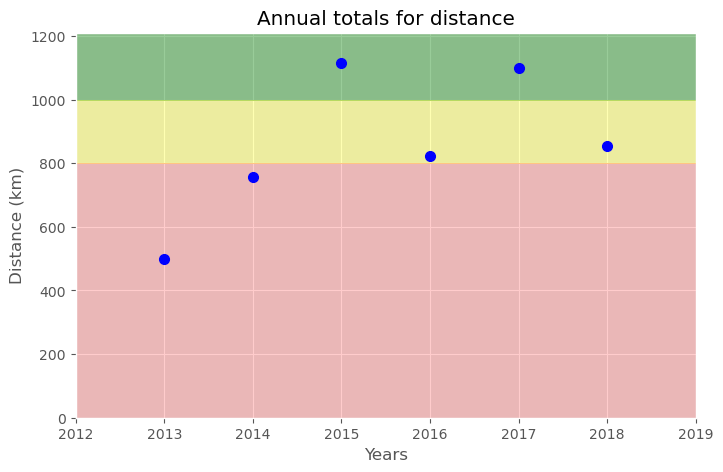

In [128]:
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = run_dist_annual.plot(marker='.', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

# Show plot
plt.show()

### Am I progressing?
Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills?

To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.

We are going to use statsmodels library to decompose the weekly trend.

In [141]:
run_dist_weekly = run_2013_2018['Distance (km)'].resample('W').bfill()
run_dist_weekly.head()

Date
2013-01-06    3.09
2013-01-13    6.72
2013-01-20    8.65
2013-01-27    3.07
2013-02-03    3.07
Freq: W-SUN, Name: Distance (km), dtype: float64

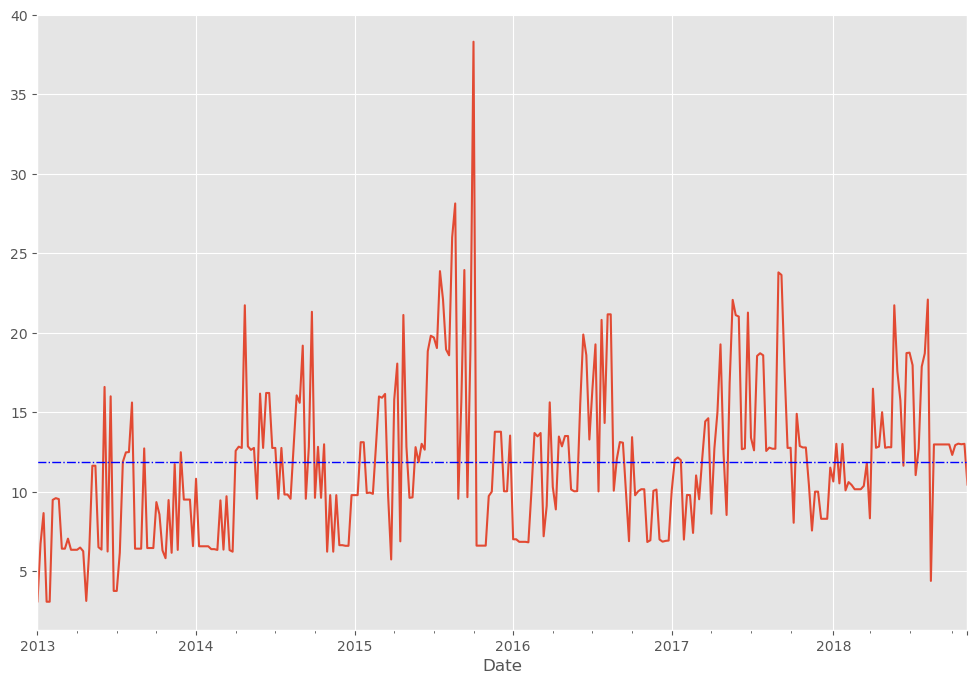

In [152]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = run_dist_weekly.plot()
ax.axhline(run_dist_weekly.mean(), color='blue', linewidth=1, linestyle='-.')


plt.show()

<Figure size 1200x500 with 0 Axes>

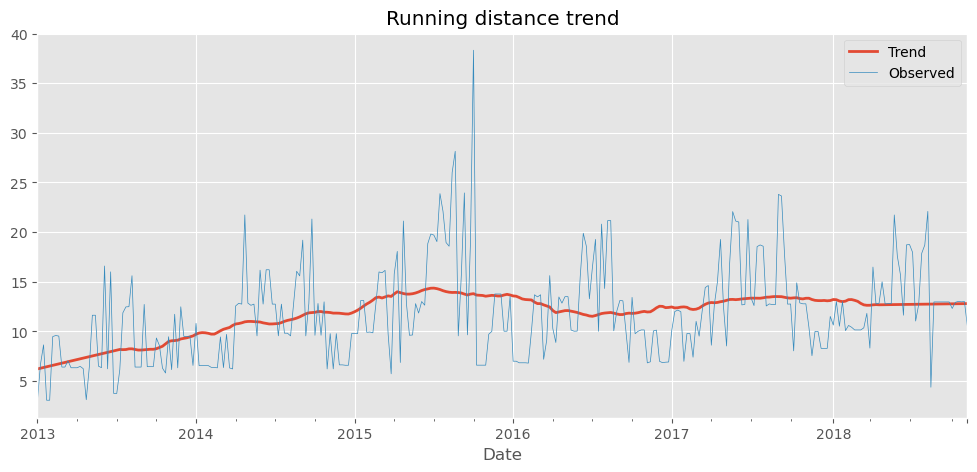

In [147]:
# Import required library
import statsmodels.api as sm

decomposed = sm.tsa.seasonal_decompose(run_dist_weekly, extrapolate_trend=1, period=52)

# Create plot
fig = plt.figure(figsize=(12,5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

### Training intensity
**Heart rate** is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.

We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones.

In [163]:
run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']
run_hr_all.head()

<ipython-input-163-ea9259fdcabf>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']


Date
2017-12-30 17:11:53    150.0
2017-12-27 18:50:24    147.0
2017-12-04 18:14:41    142.0
2017-11-25 12:17:22    157.0
2017-11-22 18:21:12    140.0
Name: Average Heart Rate (bpm), dtype: float64

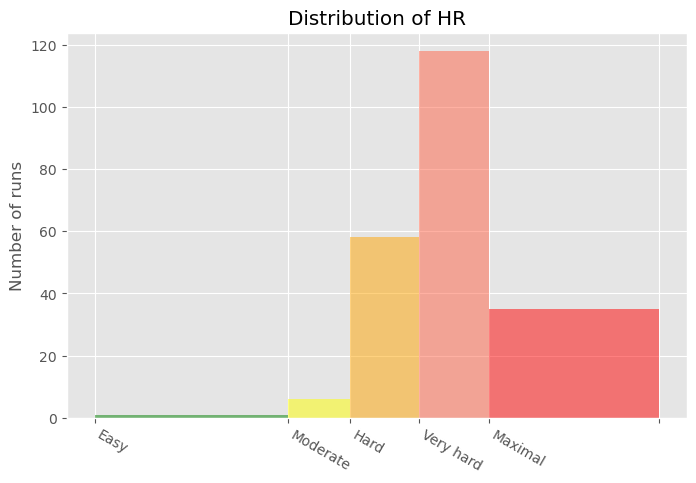

In [183]:
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal', '']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red', 'blue']

fig, ax = plt.subplots(figsize=(8,5))

# Plot and customize
n, bins, patches = ax.hist(run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

# Show plot
plt.show()

### Detailed summary report
With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training.

To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.

In [192]:
# Concatenating three DataFrames
df_run_walk_cycle = df_run.append(df_walk).append(df_cycle).sort_index(ascending=False)
df_run_walk_cycle.head()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [204]:
dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack()

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

In [201]:
df_summary['Distance (km)', 'total']

Type
Cycling     680.58
Running    5224.50
Walking      33.45
Name: (Distance (km), total), dtype: float64

In [207]:
df_run_walk_cycle.groupby('Type')[dist_climb_cols].max()


,Distance (km),Climb (m)
Type,,
Cycling,49.18,553
Running,38.32,982
Walking,4.29,112


**Note**

This project is one of DataCamp Project.

**`28.09.2021`**